## Comparison of Classifiers for NBA Game Prediction

This notebook demonstrates how to use the `DataProcessor`
and `DataClassifier` classes to collect NBA stats and
analyze them to predict NBA game outcomes.  

Specifically, these methods use an individual 
team's box score to predict whether they will win or lose
a given game.

`DataProcessor` handles the following data pipeline steps:
 - Acquisition
 - Integration
 - Processing
 
`DataClassifier` handles the steps:
 - Modeling (select features, parameters, classifiers)
 - Classify various models
 - Evaluate
 - Plot results

In [1]:
from src.DataProcessor import DataProcessor
from src.DataClassifier import DataClassifier

### Aquisition

`DataProcessor` contains the following methods.

Note you can also call `dp.update_and_process_all_data()`
to run all these methods.

In [2]:
dp = DataProcessor()

These methods scrape player box scores, team box scores, 
and season schedule data for 2000-current seasons using
the scraping utility https://www.basketball-reference.com/. 
Files are placed in `data_raw` folder.

In [3]:
dp.scrape_data_player_box_scores()
dp.scrape_data_team_box_scores()
dp.scrape_data_season_schedule()


Scraping player box score data.

Player box score data found for season: 1999-2000
Player box score data found for season: 2000-2001
Player box score data found for season: 2001-2002
Player box score data found for season: 2002-2003
Player box score data found for season: 2003-2004
Player box score data found for season: 2004-2005
Player box score data found for season: 2005-2006
Player box score data found for season: 2006-2007
Player box score data found for season: 2007-2008
Player box score data found for season: 2008-2009
Player box score data found for season: 2009-2010
Player box score data found for season: 2010-2011
Player box score data found for season: 2011-2012
Player box score data found for season: 2012-2013
Player box score data found for season: 2013-2014
Player box score data found for season: 2014-2015
Player box score data found for season: 2015-2016
Player box score data found for season: 2016-2017
Player box score data found for season: 2017-2018
Player box score

### Integration, Processing

`create_processed_team_box_and_add_season_schedule()`:
    Creates `data_preprocessed` folder and merges team box
    scores with season schedule.  Adds the following data:
    win/loss, home/away, opponent, opponent score.

`add_fgp_tpp_tr_to_processed_team_box()`:
    Adds derived features recommended by professional 
    NBA analysts to preprocessed data.

`write_complete_processed_team_box()`:
    Writes single csv file for classification and validation phase.

In [4]:
dp.create_processed_team_box_and_add_season_schedule()
dp.add_fgp_tpp_tr_to_processed_team_box()
dp.write_complete_processed_team_box()


Adding season schedule to team box scores (e.g, win/loss, home/away, opponent score).

Merged team box score data found for season: 2000-2001
Merged team box score data found for season: 2001-2002
Merged team box score data found for season: 2002-2003
Merged team box score data found for season: 2003-2004
Merged team box score data found for season: 2004-2005
Merged team box score data found for season: 2005-2006
Merged team box score data found for season: 2006-2007
Merged team box score data found for season: 2007-2008
Merged team box score data found for season: 2008-2009
Merged team box score data found for season: 2009-2010
Merged team box score data found for season: 2010-2011
Merged team box score data found for season: 2011-2012
Merged team box score data found for season: 2012-2013
Merged team box score data found for season: 2013-2014
Merged team box score data found for season: 2014-2015
Merged team box score data found for season: 2015-2016
Merged team box score data found

### Visualizing Data

Given the processed data, we may now plot a correlation matrix between team box score and the given game outcome.  This will lead us to select specific features (box score stats) for modeling. 

In [5]:
dc = DataClassifier()

# Load complete preprocessed data set.
dc.load_data()


Loading model from processed data.



In [6]:
# Plot first few rows of data (i.e., from fall of season 2000-2001)
dc.team_full_df.head()

,team,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,...,personal_fouls,game_date,location,outcome,game_score,opponent,opponent_score,field_goal_percentage,three_point_percentage,total_rebounds
0,CHARLOTTE HORNETS,240,35,62,5,9,31,40,7,37,...,23,2000-10-31,away,win,106.0,ATLANTA HAWKS,82.0,0.360825,0.357143,44
1,ATLANTA HAWKS,240,30,81,6,15,16,21,11,18,...,31,2000-10-31,home,loss,82.0,CHARLOTTE HORNETS,106.0,0.270270,0.285714,29
2,SACRAMENTO KINGS,240,40,73,5,13,15,19,5,32,...,23,2000-10-31,away,win,100.0,CHICAGO BULLS,81.0,0.353982,0.277778,37
3,CHICAGO BULLS,240,26,67,6,8,23,29,7,22,...,20,2000-10-31,home,loss,81.0,SACRAMENTO KINGS,100.0,0.279570,0.428571,29
4,MILWAUKEE BUCKS,240,33,83,6,19,21,26,17,34,...,27,2000-10-31,away,loss,93.0,DALLAS MAVERICKS,97.0,0.284483,0.240000,51


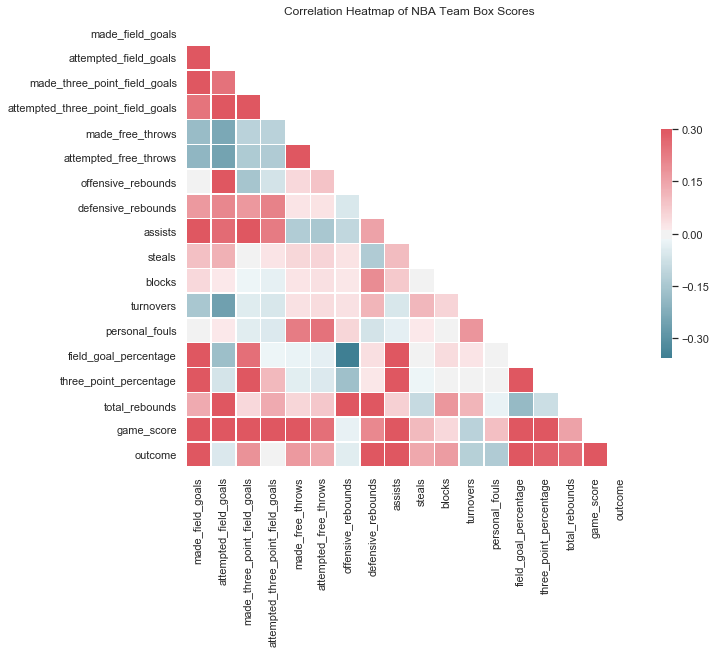

In [12]:
# Plot correlation of box scores, stats, and win/loss
# to identify key features for modeling and classifying

import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drop_labels = ["team", "minutes_played", "game_date", \
               "location", "opponent", "opponent_score"]
plot_df = dc.team_full_df.drop(columns=drop_labels)
cols = list(plot_df.columns)
cols.remove("game_score")
cols.remove("outcome")
cols.append("game_score")
cols.append("outcome")
plot_df = plot_df[cols]
plot_df.outcome = plot_df.outcome.eq("win").mul(1)

sns.set(style="white")

# Compute the correlation matrix
corr = plot_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(10,12))
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, \
                       
                       center=0, square=True, linewidths=.5, \
                       cbar_kws={"shrink": .5}, ax=ax)
plt.title("Correlation Heatmap of NBA Team Box Scores")
plt.gcf().subplots_adjust(bottom=0.35)

if not os.path.isdir("images"):
    os.mkdir("images")

sns_plot.get_figure().savefig("./images/corr_heatmap.png")

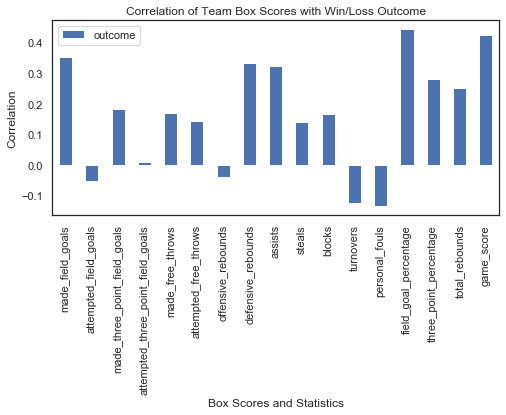

In [8]:
# Plot correlation of stats with outcome (win/loss)

corr_df = pd.DataFrame(corr)

corr_plt = corr_df.drop(labels="outcome").plot(kind="bar", \
                                               y="outcome", \
                                               figsize=(8,15))
plt.title("Correlation of Team Box Scores with Win/Loss Outcome")
plt.xlabel("Box Scores and Statistics")
plt.ylabel("Correlation")

plt.gcf().subplots_adjust(bottom=0.7)

corr_plt.get_figure().savefig("./images/corr_bar_graph.png")
plt.show()

### Modeling

In [9]:
# Select features and labels for modeling.
feats = ["attempted_field_goals", \
         "field_goal_percentage",\
         "three_point_percentage",\
         "made_free_throws",\
         "defensive_rebounds",\
         "total_rebounds",
         "turnovers",\
         "personal_fouls"]
labels = ["outcome"]
skip_playoffs = True
start_year = 2007
end_year = 2020
#start_year = 2018
#end_year = 2020
dc.set_feats_and_labels(feats=feats, labels=labels, \
                        skip_playoffs=skip_playoffs, \
                        start_year=start_year, \
                        end_year=end_year)


# Set data shuffling parameters.
n_splits = 1
test_size = 0.2
dc.set_train_test_split(n_splits=n_splits, \
                        test_size=test_size, rng_seed=0)


# Set classifiers from scikit-learn
classifiers = ["KNN", \
               "DTC", \
               "RFC", \
               "ABC",\
               "GBC", \
               "GNB", \
               "LDA", \
               "QDA", \
               "LR"]
dc.set_classifiers(classifiers=classifiers)

### Training, Evaluation, Plotting

Trains and tests/evaluates all classification models.
Shuffles data for cross-validation using 
StratifiedShuffleSplit (stratified k-fold with shuffling). 
Logs results.

In [10]:
dc.train_and_test_models(verbose=True)

KNeighborsClassifier
****Results****
Accuracy : 63.6036%
Log Loss : 4.1664365
DecisionTreeClassifier
****Results****
Accuracy : 71.6517%
Log Loss : 9.7911726
RandomForestClassifier
****Results****
Accuracy : 77.1171%
Log Loss : 0.82391909
AdaBoostClassifier
****Results****
Accuracy : 79.8398%
Log Loss : 0.67841985
GradientBoostingClassifier
****Results****
Accuracy : 80.0200%
Log Loss : 0.42626136
GaussianNB
****Results****
Accuracy : 78.5586%
Log Loss : 0.44592249
LinearDiscriminantAnalysis
****Results****
Accuracy : 80.6507%
Log Loss : 0.40985224
QuadraticDiscriminantAnalysis
****Results****
Accuracy : 80.4304%
Log Loss : 0.41260307
LogisticRegression
****Results****
Accuracy : 80.3804%
Log Loss : 0.42088646


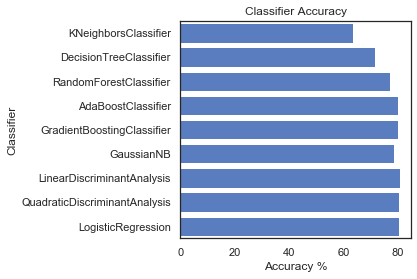

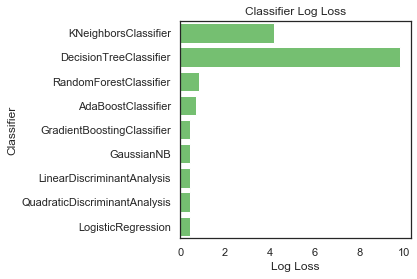

In [11]:
# Plot classifier accuracy and log loss.
dc.plot_results()